# Mise en place d'un **pipeline**

Un pipeline de données est une série d'étapes **automatisées** qui permettent de collecter, transformer et charger des données de manière efficace et reproductible. Lorsque le pipeline est en place, l'intervention humaine n'est plus nécessaire. C'est donc un type particulier de workflow misant sur l'automatisation et l'efficacité.


## Choix de l'outil

Plusieurs outils permettent de créer des pipelines de traitement des données : Apache Airflow qui est le plus utilisé, mais aussi AWS Glue pour le cloud par exemple. Nous avons choisi d'utiliser **MageAI** car cet outil est spécialisé dans la création de pipelines intégrant du Machine Learning (conçu pour pouvoir utiliser des bibliothèques populaires comme TensorFlow, PyTorch ou Scikit-learn). De plus, l'interface utilisateur est très intuitive et ne nécessite pas d'utiliser beaucoup de code.

## Création de l'environnement Docker

Il est intéressant d'utiliser MageAi dans un environnement **Docker** car cela facilite le déploiement futur du pipeline (c'est-à-dire la mise à disposition après les phases de développement et de tests).

En effet, Docker permet d'automatiser le déploiement des différents éléments de notre pipeline dans des **conteneurs standardisés** et d'encapsuler leurs dépendances, telles que les bibliothèques et autres configurations système, afin qu'ils puissent fonctionner de manière cohérente dans n'importe quel environnement !

### Première étape : création d'un dossier pour le projet

In [ ]:
# Créer sur l'ordinateur un nouveau dossier portant le nom du projet,
# par exemple, "wild3"

# Identifier le chemin d'accès à ce dossier,
# par exemple, C:\Users\Mainell\Documents


### Deuxième étape : ajout des fichiers nécessaires

In [ ]:
# Lancer Anaconda, ouvrir VS Code, cliquer sur "File", puis "Open Folder"
# et choisir le dossier qui vient d'être créé : "wild3"

# Vérifier avec le terminal (cmd) de VS Code que vous êtes dans le bon dossier,
# sinon, y aller avec les commandes suivantes
# cd Documents
# cd wild3

# Dans ce dossier, il faut impérativement créer six fichiers nécessaires
# au bon fonctionnement de Docker et de MageAI !

#### Fichier n°1 : Dockerfile

(base) C:\Users\Mainell\Documents\wild3>echo. > Dockerfile

In [ ]:
# Un Dockerfile est un script de configuration utilisé pour automatiser le processus de création d'une image Docker.
# Cette image Docker servira de base à la création de conteneurs.
# Il contient une série de commandes et d'instructions que Docker utilisera pour assembler l'image pour MageAI.

FROM python:3.9-slim
# Cette ligne indique l'image de base à utiliser pour la construction de l'image Docker.
# Ici, l'image de base est python:3.9-slim, qui est une version allégée de l'image officielle de Python 3.9.
# Elle contient les outils et bibliothèques essentiels pour exécuter des applications Python,
# mais est optimisée pour être plus petite que les images Python standard.

RUN apt-get update && apt-get install -y git && apt-get install -y build-essential && rm -rf /var/lib/apt/lists/*
# Cette commande est exécutée lors de la construction de l'image.
# Elle met à jour la liste des paquets disponibles,
# installe Git dans le conteneur (ce qui peut être nécessaire pour les dépendances ou scripts qui utilisent Git),
# puis supprime les fichiers de liste de paquets pour réduire la taille de l'image.
# Les options utilisées sont :
#     * apt-get update : met à jour la liste des paquets.
#     * apt-get install -y git : installe Git sans demander de confirmation grâce à l'option -y.
#     * apt-get install -y build-essential : install gcc qui est nécessaire au projet
#     * rm -rf /var/lib/apt/lists/* : supprime les fichiers de liste de paquets pour garder l'image légère.

RUN pip install --upgrade pip setuptools wheel
# Mise à jour de pip, setuptools et wheel.
# Setuptools et wheel facilitent la distribution et l'installation des packages Python.

COPY requirements.txt requirements.txt
# Copie le fichier requirements.txt de votre projet (situé sur votre machine ou dans votre répertoire source)
# dans le répertoire /app du conteneur, en conservant le nom du fichier: requirements.txt.
# Il faut réaliser la copie avant l'installation car cela évite de tout réinstaller si seul le code source change !

RUN pip install --no-cache-dir -r requirements.txt
# Exécute pip install pour installer les paquets Python listés dans le fichier requirements.txt.
# L'option --no-cache-dir empêche pip de garder une copie des fichiers de paquet téléchargés,
# ce qui est une autre mesure pour garder l'image Docker légère.
# L'option -r indique à pip de lire à partir du fichier de requirements spécifié (requirements.txt dans ce cas).

RUN playwright install --with-deps chromium
RUN pip install dbt-core

WORKDIR /app
# Définit le répertoire de travail dans le conteneur Docker.
# Cela signifie que toutes les actions ultérieures,
# comme la copie de fichiers ou l'exécution de commandes,
# seront effectuées dans le chemin /<mon dossier> à l'intérieur du conteneur.

COPY . .
# Copie tous les autres fichiers et dossiers du répertoire courant (de votre machine ou répertoire source)
# dans le répertoire de travail actuel du conteneur Docker (défini par WORKDIR /<mon dossier>).

CMD ["mage", "start"]
# Ici, "mage" est l'exécutable configuré dans l'image, que vous souhaitez exécuter avec l'argument "start".
# Cette commande n'est exécutée que lorsque le conteneur est lancé, pas au moment de la construction de l'image.

#### Fichier n°2 : .env

(base) C:\Users\Mainell\Documents\wild3>echo. > .env

In [ ]:
# Les fichiers .env jouent un rôle crucial dans la gestion des configurations d'applications dans de nombreux environnements de développement.
# Ces fichiers permettent de stocker des configurations qui peuvent varier entre différents environnements (développement, test, production) sans changer le code source.
# Le fichier .env ne doit surtout pas être publié sur github !

# Projet
BDD_NAME=PostgresDB_container
CONT_1_NAME=MageAI_container

# PostgreSQL
POSTGRES_DBNAME=my_pg_db
POSTGRES_USER=***** # (à personnaliser)
POSTGRES_PASSWORD=***** # (à personnaliser)
POSTGRES_PORT=5432
POSTGRES_HOST=my_postgres_db
POSTGRES_schema=public

# MageAI
ENV=mon_profil_custom

#### Fichier n°3 : docker-compose.yml

(base) C:\Users\Mainell\Documents\wild3>echo. > docker-compose.yml

In [ ]:
# Ce fichier YAML orchestre les conteneurs MageAI et PostgreSQL.
# Il est utilisé pour définir et configurer les services, réseaux et volumes pour les applications Docker multi-conteneurs.
# Il permet de gérer et de déployer plusieurs conteneurs Docker simultanément, avec une seule commande au lieu de construire et exécuter chaque conteneur séparément avec des commandes Docker individuelles.

version : '3.8'

services:

  postgres :
    image : postgres:14
    container_name : ${BDD_NAME}
    ports:
      - "${POSTGRES_PORT}:5432"
    env_file:
      - .env
      # Charge les variables d'environnement définies dans le fichier .env situé dans le même dossier que docker-compose.yml.
    environment:
      POSTGRES_DB: ${POSTGRES_DBNAME}
      POSTGRES_USER: ${POSTGRES_USER}
      POSTGRES_PASSWORD: ${POSTGRES_PASSWORD}
    volumes:
      - postgres_data:/var/lib/postgresql/data

  mage_ai:
    build:
      context: .
      dockerfile: Dockerfile
    container_name: ${CONT_1_NAME}
    ports:
      - "6789:6789"
    env_file:
      - .env
    environment:
      POSTGRES_DB: ${POSTGRES_DBNAME}
      POSTGRES_USER: ${POSTGRES_USER}
      POSTGRES_PASSWORD: ${POSTGRES_PASSWORD}
      POSTGRES_HOST: ${POSTGRES_HOST}
      POSTGRES_PORT: ${POSTGRES_PORT}
      POSTGRES_SCHEMA: ${POSTGRES_SCHEMA}
    # Définit des variables d'environnement utilisées par MageAI pour se connecter et interagir avec la base de données.

volumes:
  postgres_data:

#### Fichier n°4 : requirements.txt

(base) C:\Users\Mainell\Documents\wild3>echo. > requirements.txt

In [ ]:
mage-ai         # Notre ETL préféré.
python-dotenv   # Pour lire nos variables d'environnement depuis le fichier .env.
sshtunnel       # Création de tunnels SSH pour accéder de manière sécurisée à des services qui ne sont pas directement exposés sur le réseau.
psycopg2-binary # Un adaptateur Python pour PostgreSQL.
pandas          # Pour le traitement de nos données dans notre pipeline.
datetime        # Toujours pratique pour formater et effectuer des calculs avec des objets date et heure.
botocore        # Interactions avec les services AWS.
dask[dataframe] # Permet de manipuler de grands ensembles de données avec des DataFrames, avec des performances optimisées pour le traitement parallèle.
dbt-postgres    # Utilisation de DBT avec PostgreSQL
dbt-core
dbt
yfinance
streamlit
selenium
selenium-stealth
webdriver-manager
nltk
vaderSentiment
sshtunnel
bs4
playwright
asyncio

#### Fichier n°5 : io_config.yaml

(base) C:\Users\Mainell\Documents\wild3>echo. > io_config.yaml



In [ ]:
MyConfigProfile:

  POSTGRES_CONNECT_TIMEOUT: 10
  POSTGRES_DBNAME: my_pg_db
  POSTGRES_SCHEMA: public
  POSTGRES_USER: ***** # (à personnaliser)
  POSTGRES_PASSWORD: ***** # (à personnaliser)
  POSTGRES_HOST: postgres
  POSTGRES_PORT: 5432

  version: 0.1.1

#### Fichier n°6 : .gitignore

(base) C:\Users\Mainell\Documents\wild3>echo. > .gitignore

In [ ]:
.env

### Troisième étape : construction des conteneurs

Vérifier que **Docker Desktop** est bien installé sur l'ordinateur. Dans les paramètres de Docker Desktop ("Settings"), aller dans "Resources", puis "WSL integration". Cocher "Enable integration" puis activer "Ubuntu". Tester :

(base) C:\Users\Mainell\Documents\wild3>docker --version


In [ ]:
Docker version 27.4.0, build bde2b89

Vérifier qu'**Ubuntu** est bien installé sur l'ordinateur. Dans le terminal Ubuntu (WSL), tester Docker avec cette commande :

mainell@MSI:~$ docker run hello-world

In [ ]:
# Message qui doit apparaître !
Hello from Docker!
This message shows that your installation appears to be working correctly.

To generate this message, Docker took the following steps:
 1. The Docker client contacted the Docker daemon.
 2. The Docker daemon pulled the "hello-world" image from the Docker Hub.
    (amd64)
 3. The Docker daemon created a new container from that image which runs the
    executable that produces the output you are currently reading.
 4. The Docker daemon streamed that output to the Docker client, which sent it
    to your terminal.

To try something more ambitious, you can run an Ubuntu container with:
 $ docker run -it ubuntu bash

Share images, automate workflows, and more with a free Docker ID:
 https://hub.docker.com/

For more examples and ideas, visit:
 https://docs.docker.com/get-started/

Revenir dans VS Code et dans le dossier du projet et lancer l'étape finale :

(base) C:\Users\Mainell\Documents\wild3>docker compose up --build --detach\\

In [ ]:
# Vérifier qu'il n'y a pas eu de problème durant la construction des deux conteneurs :
# Il ne doit y avoir que des petits "V" verts ;
# Les deux conteneurs doivent apparaître dans Docker Desktop.

### Bonus : nettoyage de Docker si besoin

In [ ]:
# VS Code
(base) C:\Users\Mainell\Documents\wild3>docker compose down
(base) C:\Users\Mainell\Documents\wild3>docker compose up --build --detach

## DBeaver pour explorer le conteneur PostgresDB_container

DBeaver permet d'accéder à la base de données "my_pg_db". Grâce à ce logiciel, il sera possible de voir le résultat de l'ETL mis en place dans le pipeline MageAI.

Commencer par ouvrir DBeaver, aller dans "Base de données", puis cliquer sur "Nouvelle connexion". Il faut ensuite choisir "PostgreSQL" et renseigner les informations ci-dessous :

In [ ]:
# SERVER
Connect by : Host
Host : localhost
# Database : my_pg_db ?
# Database: postgres ?
Port : 5432

# AUTHENTIFICATION
Authentification : Database Native
Nom utilisateur : ***** # (à personnaliser)
Mot de passe : ***** # (à personnaliser)

## MageAI pour paramétrer le conteneur MageAI_container

Dans Docker Desktop, accéder à l'interface web de MageAI_container en cliquant sur le contenu de la colonne "Port(s)" :

http://localhost:6789/overview?tab=today

### Ajout des différents blocs composant le pipeline

Sélectionner "New pipeline", puis "Standard (batch)". Ajouter le nom du pipeline et cliquer sur "Create".

#### API_production

In [ ]:
# Premier bloc : "Data Loader" de l'API EIA "production"
# Python / API

import pandas as pd
import numpy as np
import requests
if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@data_loader
def load_data_from_api_production(*args, **kwargs):
    """
    Charge les données depuis l'API
    """
    api_key="&api_key=4blAbaNUuijD7vmrU3MUw9BgcIdYMCs0xpxqomst"
    field_production_api_url = "https://api.eia.gov/v2/petroleum/sum/sndw/data/?frequency=weekly&data[0]=value&facets[series][]=WCRFPUS2&sort[0][column]=period&sort[0][direction]=desc&offset=0"+api_key
    response = requests.get(field_production_api_url).json()
    df_field_production = pd.json_normalize(response, record_path=["response","data"])

    return df_field_production


@test
def test_output(output, *args) -> None:
    """
    Vérifie la validité des données.
    """
    assert output is not None, 'Les données sont vides.'

In [ ]:
# Deuxième bloc : "Transformer" de l'API EIA "production"
# Python / Généric

if 'transformer' not in globals():
    from mage_ai.data_preparation.decorators import transformer
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@transformer
def transform(data, *args, **kwargs):
    """
    Template code for a transformer block.

    Add more parameters to this function if this block has multiple parent blocks.
    There should be one parameter for each output variable from each parent block.

    Args:
        data: The output from the upstream parent block
        args: The output from any additional upstream blocks (if applicable)

    Returns:
        Anything (e.g. data frame, dictionary, array, int, str, etc.)
    """
    # Renommer la colonne "period" en "Date"
    data.rename(columns={'period': 'Date'}, inplace=True)

    return data


@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert output is not None, 'The output is undefined'


In [ ]:
# Troisième bloc : "Data Exporter" de l'API EIA "production"
# Python / PostgreSQL

from mage_ai.settings.repo import get_repo_path
from mage_ai.io.config import ConfigFileLoader
from mage_ai.io.postgres import Postgres
from pandas import DataFrame
from os import path

@data_exporter
def export_data(df: DataFrame, **kwargs) -> None:
    """
    Exporte les données vers PostgreSQL avec gestion d'erreurs
    """
    config_path = path.join(get_repo_path(), 'io_config.yaml')

    # Vérification du fichier de configuration
    if not path.exists(config_path):
        raise FileNotFoundError(f"Le fichier de configuration n'existe pas : {config_path}")

    try:
        config_profile = 'MyConfigProfile'
        schema_name = 'public'
        table_name = 'api_production'

        with Postgres.with_config(ConfigFileLoader(config_path, config_profile)) as loader:
            loader.export(
                df,
                schema_name,
                table_name,
                index=False,
                if_exists='replace',
            )
            print(f"Données exportées avec succès dans {schema_name}.{table_name}")

    except KeyError as e:
        print(f"Erreur de configuration : {e}")
        print("Vérifiez que votre fichier io_config.yaml contient une section 'MyConfigProfile'")
        raise
    except Exception as e:
        print(f"Erreur lors de l'export : {e}")
        print("Vérifiez vos paramètres de connexion et que PostgreSQL est accessible")
        raise

#### API_stock

In [ ]:
# DATA LOADER

import pandas as pd
import numpy as np
import requests
if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@data_loader
def load_data_from_api_sotck(*args, **kwargs):
    api_key="&api_key=4blAbaNUuijD7vmrU3MUw9BgcIdYMCs0xpxqomst"
    commercial_stock_api_url = "https://api.eia.gov/v2/petroleum/stoc/wstk/data/?frequency=weekly&data[0]=value&facets[duoarea][]=NUS&facets[process][]=SAX&facets[product][]=EPC0&sort[0][column]=period&sort[0][direction]=desc&offset=0"+api_key
    response = requests.get(commercial_stock_api_url).json()
    df_commercial_stock = pd.json_normalize(response, record_path=["response", "data"])

    return df_commercial_stock


@test
def test_output(output, *args) -> None:
    """
    Vérifie la validité des données.
    """
    assert output is not None, 'Les données sont vides.'


In [ ]:
# TRANSFORMER

if 'transformer' not in globals():
    from mage_ai.data_preparation.decorators import transformer
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@transformer
def transform(data, *args, **kwargs):
    """
    Template code for a transformer block.

    Add more parameters to this function if this block has multiple parent blocks.
    There should be one parameter for each output variable from each parent block.

    Args:
        data: The output from the upstream parent block
        args: The output from any additional upstream blocks (if applicable)

    Returns:
        Anything (e.g. data frame, dictionary, array, int, str, etc.)
    """
    # Renommer la colonne "period" en "Date"
    data.rename(columns={'period': 'Date'}, inplace=True)

    return data


@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert output is not None, 'The output is undefined'


In [ ]:
# # #
# Proposition intégrant un "TRANSFORMER" SQL

# Veillez à paramétrer correctement les menus déroulants en haut du bloc
# "Connection" -> "PostgreSQL" & "Profile" -> "MyConfigProfile"
# Filtrer la colonne "product_name" pour que seules les lignes avec "Crude Oil" restent

SELECT * FROM {{ df_1 }} WHERE product_name LIKE 'Crude Oil'
# # #

In [ ]:
# DATA EXPORTER

from mage_ai.settings.repo import get_repo_path
from mage_ai.io.config import ConfigFileLoader
from mage_ai.io.postgres import Postgres
from pandas import DataFrame
from os import path

@data_exporter
def export_data(df: DataFrame, **kwargs) -> None:
    """
    Exporte les données vers PostgreSQL avec gestion d'erreurs
    """
    config_path = path.join(get_repo_path(), 'io_config.yaml')

    # Vérification du fichier de configuration
    if not path.exists(config_path):
        raise FileNotFoundError(f"Le fichier de configuration n'existe pas : {config_path}")

    try:
        config_profile = 'MyConfigProfile'
        schema_name = 'public'
        table_name = 'api_stock'

        with Postgres.with_config(ConfigFileLoader(config_path, config_profile)) as loader:
            loader.export(
                df,
                schema_name,
                table_name,
                index=False,
                if_exists='replace',
            )
            print(f"Données exportées avec succès dans {schema_name}.{table_name}")

    except KeyError as e:
        print(f"Erreur de configuration : {e}")
        print("Vérifiez que votre fichier io_config.yaml contient une section 'MyConfigProfile'")
        raise
    except Exception as e:
        print(f"Erreur lors de l'export : {e}")
        print("Vérifiez vos paramètres de connexion et que PostgreSQL est accessible")
        raise

####API_supply

In [ ]:
# DATA LOADER
import pandas as pd
import numpy as np
import requests
if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@data_loader
def load_data_from_api_supply(*args, **kwargs):
    api_key="&api_key=4blAbaNUuijD7vmrU3MUw9BgcIdYMCs0xpxqomst"
    days_supply_api_url = "https://api.eia.gov/v2/petroleum/sum/sndw/data/?frequency=weekly&data[0]=value&facets[series][]=W_EPC0_VSD_NUS_DAYS&sort[0][column]=period&sort[0][direction]=desc&offset=0"+api_key
    response = requests.get(days_supply_api_url).json()
    df_days_supply = pd.json_normalize(response, record_path=["response", "data"])

    return df_days_supply


@test
def test_output(output, *args) -> None:
    """
    Vérifie la validité des données.
    """
    assert output is not None, 'Les données sont vides.'

In [ ]:
# TRANSFORMER

if 'transformer' not in globals():
    from mage_ai.data_preparation.decorators import transformer
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@transformer
def transform(data, *args, **kwargs):
    """
    Template code for a transformer block.

    Add more parameters to this function if this block has multiple parent blocks.
    There should be one parameter for each output variable from each parent block.

    Args:
        data: The output from the upstream parent block
        args: The output from any additional upstream blocks (if applicable)

    Returns:
        Anything (e.g. data frame, dictionary, array, int, str, etc.)
    """
    # Renommer la colonne "period" en "Date"
    data.rename(columns={'period': 'Date'}, inplace=True)

    return data


@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert output is not None, 'The output is undefined'


In [ ]:
# DATA EXPORTER

from mage_ai.settings.repo import get_repo_path
from mage_ai.io.config import ConfigFileLoader
from mage_ai.io.postgres import Postgres
from pandas import DataFrame
from os import path

@data_exporter
def export_data(df: DataFrame, **kwargs) -> None:
    """
    Exporte les données vers PostgreSQL avec gestion d'erreurs
    """
    config_path = path.join(get_repo_path(), 'io_config.yaml')

    # Vérification du fichier de configuration
    if not path.exists(config_path):
        raise FileNotFoundError(f"Le fichier de configuration n'existe pas : {config_path}")

    try:
        config_profile = 'MyConfigProfile'
        schema_name = 'public'
        table_name = 'api_supply'

        with Postgres.with_config(ConfigFileLoader(config_path, config_profile)) as loader:
            loader.export(
                df,
                schema_name,
                table_name,
                index=False,
                if_exists='replace',
            )
            print(f"Données exportées avec succès dans {schema_name}.{table_name}")

    except KeyError as e:
        print(f"Erreur de configuration : {e}")
        print("Vérifiez que votre fichier io_config.yaml contient une section 'MyConfigProfile'")
        raise
    except Exception as e:
        print(f"Erreur lors de l'export : {e}")
        print("Vérifiez vos paramètres de connexion et que PostgreSQL est accessible")
        raise

#### Yahoo Finances

In [ ]:
# DATA LOADER

import pandas as pd
import numpy as np
import requests
import yfinance as yf
from datetime import datetime
if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@data_loader
def oil_historical_price_yahoo():
    df_historical_yahoo = yf.download('CL=F', start='1986-01-01', end=datetime.today().strftime('%Y-%m-%d'))
    df_historical_yahoo.columns = [col[0] if isinstance(col, tuple) else col for col in df_historical_yahoo.columns]
    return df_historical_yahoo


@test
def test_output(output, *args) -> None:
    """
    Vérifie la validité des données.
    """
    assert output is not None, 'Les données sont vides.'

In [ ]:
# TRANSFORMER

import pandas as pd
from datetime import datetime

if 'transformer' not in globals():
    from mage_ai.data_preparation.decorators import transformer
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@transformer
def transform(data, *args, **kwargs):
    """
    Template code for a transformer block.

    Add more parameters to this function if this block has multiple parent blocks.
    There should be one parameter for each output variable from each parent block.

    Args:
        data: The output from the upstream parent block
        args: The output from any additional upstream blocks (if applicable)

    Returns:
        Anything (e.g. data frame, dictionary, array, int, str, etc.)
    """
    # Reset de l'index pour que la Date devienne une colonne
    df_yahoo_date = data.reset_index()
    df_yahoo_date['Date'] = pd.to_datetime(df_yahoo_date['Date']).dt.strftime('%Y-%m-%d')

    return df_yahoo_date


@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert output is not None, 'The output is undefined'


In [ ]:
# DATA EXPORTER

from mage_ai.settings.repo import get_repo_path
from mage_ai.io.config import ConfigFileLoader
from mage_ai.io.postgres import Postgres
from pandas import DataFrame
from os import path

@data_exporter
def export_data(df: DataFrame, **kwargs) -> None:
    """
    Exporte les données vers PostgreSQL avec gestion d'erreurs
    """
    config_path = path.join(get_repo_path(), 'io_config.yaml')

    # Vérification du fichier de configuration
    if not path.exists(config_path):
        raise FileNotFoundError(f"Le fichier de configuration n'existe pas : {config_path}")

    try:
        config_profile = 'MyConfigProfile'
        schema_name = 'public'
        table_name = 'yahoo'

        with Postgres.with_config(ConfigFileLoader(config_path, config_profile)) as loader:
            loader.export(
                df,
                schema_name,
                table_name,
                index=False,
                if_exists='replace',
            )
            print(f"Données exportées avec succès dans {schema_name}.{table_name}")

    except KeyError as e:
        print(f"Erreur de configuration : {e}")
        print("Vérifiez que votre fichier io_config.yaml contient une section 'MyConfigProfile'")
        raise
    except Exception as e:
        print(f"Erreur lors de l'export : {e}")
        print("Vérifiez vos paramètres de connexion et que PostgreSQL est accessible")
        raise

#### Sentiment Analysis

In [ ]:
# DATA LOADER N°1 : API News
import pandas as pd
import requests
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test

@data_loader
def apinews_tendance_globale(*args, **kwargs):
    kwarg_logger = kwargs.get("logger")
    kwarg_logger.info("Démarrage du loader")

    # URL de l'API pour récupérer les articles sur Crude Oil WTI
    url = "https://newsapi.org/v2/everything?q=Crude+Oil+WTI&apiKey=0ef44c92338042508e7b2ed9afc37e5b"

    try:
        # Connexion à l'API
        response = requests.get(url)
        response.raise_for_status()  # Vérifie si la requête a réussi (code 200)
        kwarg_logger.info("Connexion avec l'API effectuée")

        articles = response.json().get("articles", [])
        analyzer = SentimentIntensityAnalyzer()  # Bibliothèque pour analyser les sentiments

        # Compteurs pour les sentiments
        positive_count = 0
        negative_count = 0
        num_articles = 0

        # Traitement de chaque article
        for article in articles:
            title = article.get("title", "Titre non disponible")
            description = article.get("description", "")
            content = article.get("content", "")
            text_to_analyze = description if description else content
            if text_to_analyze:
                sentiment_score = analyzer.polarity_scores(text_to_analyze)
                compound_score = sentiment_score['compound']
                if compound_score > 0.1:
                    positive_count += 1
                elif compound_score < -0.1:
                    negative_count += 1
                num_articles += 1

        # Déterminer le sentiment global en fonction des articles
        sentiment = "aucun article"
        if num_articles > 0:
            if positive_count > negative_count:
                sentiment = "positif"
            elif negative_count > positive_count:
                sentiment = "négatif"
            else:
                sentiment = "équilibré"

        kwarg_logger.info(f"Tendance globale : {sentiment}")

        # Retourner le résultat sous forme de DataFrame
        sentiment_results = {"Date": datetime.now().strftime('%Y-%m-%d'), "API NEWS": sentiment}
        df = pd.DataFrame([sentiment_results])

        return df

    except requests.exceptions.RequestException as e:
        kwarg_logger.error(f"Erreur de requête avec l'API : {e}")
        sentiment_results = {"Date": datetime.now().strftime('%Y-%m-%d'), "API NEWS": "Erreur de connexion"}
        df = pd.DataFrame([sentiment_results])
        return df
    except Exception as e:
        kwarg_logger.error(f"Erreur inconnue : {e}")
        sentiment_results = {"Date": datetime.now().strftime('%Y-%m-%d'), "API NEWS": "Erreur inconnue"}
        df = pd.DataFrame([sentiment_results])
        return df


@test
def test_output(output, *args) -> None:
    # Vérification de la structure du DataFrame retourné
    assert output is not None, 'Le résultat est indéfini'
    assert isinstance(output, pd.DataFrame), 'Le résultat doit être un DataFrame'
    assert 'Date' in output.columns, 'Le DataFrame doit contenir une colonne Date'
    assert 'API NEWS' in output.columns, 'Le DataFrame doit contenir une colonne API NEWS'


In [ ]:
# DATA LOADER N°2 : webscraping sentiment analysis

import pandas as pd
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test

# Liste des URLs et des noms associés pour chaque site
urls = [
    {"url": "https://www.eia.gov/todayinenergy/", "name": "EIA-TodayinEnergy"},
    {"url": "https://oilprice.com/Latest-Energy-News/World-News/", "name": "OILPRICE-WorldNews"},
    {"url": "https://www.bbc.com/news/topics/cmjpj223708t", "name": "BBC-Oil"},
    {"url": "https://www.cnbc.com/quotes/@CL.1", "name": "CNBC-CrudeOilWTI"},
    {"url": "https://tradingeconomics.com/commodity/crude-oil", "name": 'TRADINGECONOMICS-CrudeOilWTI'},
    {"url": "https://www.fxstreet.com/markets/commodities/energy/oil", "name": "FXSTREET-CrudeOilWTI"},
    {"url": "https://www.barchart.com/futures/quotes/CL*0/futures-prices", "name": "BARCHART-CrudeOilWTI"},
    {"url": "https://www.cityindex.com/en-uk/news-and-analysis/wti-crude-is-down-but-not-out-while-it-holds-70/", "name": "CITYINDEX-CrudeOilWTI"}
    ]
#{"url": "https://www.investing.com/commodities/crude-oil-news", "name": "INVESTING-CrudeOilWTI"}]

@data_loader
def sitesweb_analyse_sentiment(*args, **kwargs):
    kwarg_logger = kwargs.get("logger")
    kwarg_logger.info("Démarrage de l'analyse des sentiments pour les sites web.")

    # Initialiser le sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Liste des résultats à retourner sous forme de tableau
    sentiment_results = {"Date": datetime.now().strftime('%Y-%m-%d')}

    for site in urls:
        try:
            kwarg_logger.info(f"Connexion avec le site {site['name']}")
            navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'
            html = requests.get(site['url'], headers={'User-Agent': navigator})

            # Vérifier si la requête a réussi
            html.raise_for_status()

            # Parser la page
            soup = BeautifulSoup(html.text, 'html.parser')

            # Nettoyage du HTML : suppression des balises inutiles
            for unwanted_tag in soup(['script', 'style', 'iframe', 'ins', 'advertissement', 'ads', 'ad', 'footer', 'header', 'a', 'menu', 'nav', 'aside', 'form', 'input', 'select']):
                unwanted_tag.decompose()

            # Extraire le texte de la page nettoyé
            text = soup.get_text()

            # Analyse de sentiment
            sentiment_score = sid.polarity_scores(text)
            sentiment = 'positif' if sentiment_score['compound'] >= 0 else 'négatif'

            kwarg_logger.info(f"Le sentiment pour {site['name']} est {sentiment}.")

            # Ajouter le sentiment à la liste de résultats
            sentiment_results[site['name']] = sentiment

        except requests.exceptions.RequestException as e:
            kwarg_logger.error(f"Erreur de requête pour {site['name']}: {e}")
            sentiment_results[site['name']] = 'Erreur'
        except Exception as e:
            kwarg_logger.error(f"Erreur inconnue pour {site['name']}: {e}")
            sentiment_results[site['name']] = 'Erreur'

    # Convertir les résultats en DataFrame et ajouter une ligne pour la date du jour
    df = pd.DataFrame([sentiment_results])
    kwarg_logger.info("Analyse terminée. Résultats collectés.")

    return df

@test
def test_output(output, *args) -> None:
    assert output is not None, 'Le résultat est indéfini'
    assert isinstance(output, pd.DataFrame), 'Le résultat doit être un DataFrame'
    assert 'Date' in output.columns, 'Le DataFrame doit contenir une colonne Date'
    assert 'EIA-TodayinEnergy' in output.columns, 'Le DataFrame doit contenir une colonne EIA-TodayinEnergy'
    assert 'OILPRICE-WorldNews' in output.columns, 'Le DataFrame doit contenir une colonne OILPRICE-WorldNews'
    assert 'BBC-Oil' in output.columns, 'Le DataFrame doit contenir une colonne BBC-Oil'
    assert 'CNBC-CrudeOilWTI' in output.columns, 'Le DataFrame doit contenir une colonne CNBC-CrudeOilWTI'
    assert 'TRADINGECONOMICS-CrudeOilWTI' in output.columns, 'Le DataFrame doit contenir une colonne TRADINGECONOMICS-CrudeOilWTI'
    assert 'FXSTREET-CrudeOilWTI' in output.columns, 'Le DataFrame doit contenir une colonne FXSTREET-CrudeOilWTI'
    assert 'BARCHART-CrudeOilWTI' in output.columns, 'Le DataFrame doit contenir une colonne BARCHART-CrudeOilWTI'
    assert 'CITYINDEX-CrudeOilWTI' in output.columns, 'Le DataFrame doit contenir une colonne CITYINDEX-CrudeOilWTI'

In [ ]:
# # #

# DATA LOADER N°2 : webscraping sentiment analysis
# Version améliorée

import pandas as pd
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test

# Liste des URLs et des noms associés pour chaque site
urls = [
    {"url": "https://www.eia.gov/todayinenergy/", "name": "EIA-TodayinEnergy"},
    {"url": "https://oilprice.com/Latest-Energy-News/World-News/", "name": "OILPRICE-WorldNews"},
    {"url": "https://www.bbc.com/news/topics/cmjpj223708t", "name": "BBC-Oil"},
    {"url": "https://www.cnbc.com/quotes/@CL.1", "name": "CNBC-CrudeOilWTI"},
    {"url": "https://tradingeconomics.com/commodity/crude-oil", "name": 'TRADINGECONOMICS-CrudeOilWTI'},
    {"url": "https://www.fxstreet.com/markets/commodities/energy/oil", "name": "FXSTREET-CrudeOilWTI"},
    {"url": "https://www.barchart.com/futures/quotes/CL*0/futures-prices", "name": "BARCHART-CrudeOilWTI"},
    {"url": "https://www.cityindex.com/en-uk/news-and-analysis/wti-crude-is-down-but-not-out-while-it-holds-70/", "name": "CITYINDEX-CrudeOilWTI"}
    ]
#{"url": "https://www.investing.com/commodities/crude-oil-news", "name": "INVESTING-CrudeOilWTI"}]

@data_loader
def sitesweb_analyse_sentiment(*args, **kwargs):
    kwarg_logger = kwargs.get("logger")
    kwarg_logger.info("Démarrage de l'analyse des sentiments pour les sites web.")

    # Initialiser le sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Liste des résultats à retourner sous forme de tableau
    sentiment_results = {"Date": datetime.now().strftime('%Y-%m-%d')}

    for site in urls:
        try:
            kwarg_logger.info(f"Connexion avec le site {site['name']}")
            navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'
            html = requests.get(site['url'], headers={'User-Agent': navigator})

            # Vérifier si la requête a réussi
            html.raise_for_status()

            # Parser la page
            soup = BeautifulSoup(html.text, 'html.parser')

            # Nettoyage du HTML : suppression des balises inutiles
            for unwanted_tag in soup(['script', 'style', 'iframe', 'ins', 'advertissement', 'ads', 'ad', 'footer', 'header', 'a', 'menu', 'nav', 'aside', 'form', 'input', 'select']):
                unwanted_tag.decompose()

            # Extraire le texte de la page nettoyé
            text = soup.get_text()

            # Analyse de sentiment
            sentiment_score = sid.polarity_scores(text)
            sentiment = 'positif' if sentiment_score['compound'] >= 0 else 'négatif'

            kwarg_logger.info(f"Le sentiment pour {site['name']} est {sentiment}.")

            # Ajouter le sentiment à la liste de résultats
            sentiment_results[site['name']] = sentiment

        except requests.exceptions.RequestException as e:
            kwarg_logger.error(f"Erreur de requête pour {site['name']}: {e}")
            sentiment_results[site['name']] = 'Erreur'
        except Exception as e:
            kwarg_logger.error(f"Erreur inconnue pour {site['name']}: {e}")
            sentiment_results[site['name']] = 'Erreur'

    # Convertir les résultats en DataFrame et ajouter une ligne pour la date du jour
    df = pd.DataFrame([sentiment_results])
    kwarg_logger.info("Analyse terminée. Résultats collectés.")

    return df

@test
def test_output(output, *args) -> None:
    assert output is not None, 'Le résultat est indéfini'
    assert isinstance(output, pd.DataFrame), 'Le résultat doit être un DataFrame'
    assert 'Date' in output.columns, 'Le DataFrame doit contenir une colonne Date'
    assert 'EIA-TodayinEnergy' in output.columns, 'Le DataFrame doit contenir une colonne EIA-TodayinEnergy'
    assert 'OILPRICE-WorldNews' in output.columns, 'Le DataFrame doit contenir une colonne OILPRICE-WorldNews'
    assert 'BBC-Oil' in output.columns, 'Le DataFrame doit contenir une colonne BBC-Oil'
    assert 'CNBC-CrudeOilWTI' in output.columns, 'Le DataFrame doit contenir une colonne CNBC-CrudeOilWTI'
    assert 'TRADINGECONOMICS-CrudeOilWTI' in output.columns, 'Le DataFrame doit contenir une colonne TRADINGECONOMICS-CrudeOilWTI'
    assert 'FXSTREET-CrudeOilWTI' in output.columns, 'Le DataFrame doit contenir une colonne FXSTREET-CrudeOilWTI'
    assert 'BARCHART-CrudeOilWTI' in output.columns, 'Le DataFrame doit contenir une colonne BARCHART-CrudeOilWTI'
    assert 'CITYINDEX-CrudeOilWTI' in output.columns, 'Le DataFrame doit contenir une colonne CITYINDEX-CrudeOilWTI'

# # #

In [ ]:
# TRANSFORMER

import pandas as pd

if 'transformer' not in globals():
    from mage_ai.data_preparation.decorators import transformer
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@transformer
def combine_sentiments(data, data_2, *args, **kwargs):
    # Accéder aux résultats des deux Data Loaders
    # `data` et `data_2` sont les DataFrames venant des deux blocs "data_loader"

    # Fusionner les deux DataFrames sur la colonne "Date"
    combined_df = pd.merge(data, data_2, on="Date", how="outer")

    # Liste des colonnes issues de `data_2`
    sentiment_columns_data_2 = [
        "EIA-TodayinEnergy", "OILPRICE-WorldNews", "CNBC-CrudeOilWTI",
        "TRADINGECONOMICS-CrudeOilWTI", "INVESTING-CrudeOilWTI"
    ]

    # Fonction pour calculer le bilan global
    def bilan_global(row):
        sentiment_1 = row["API NEWS"]  # Colonne de `data`

        # Initialisation du compteur des sentiments
        positive_count = 0
        negative_count = 0

        # Vérifier les sentiments dans les colonnes de `data_2`
        for sentiment_column in sentiment_columns_data_2:
            sentiment_2 = row[sentiment_column]

            # Incrémenter les compteurs de sentiments positifs et négatifs
            if sentiment_2 == "positif":
                positive_count += 1
            elif sentiment_2 == "négatif":
                negative_count += 1

        # Compter le sentiment de `data`
        if sentiment_1 == "positif":
            positive_count += 1
        elif sentiment_1 == "négatif":
            negative_count += 1

        # Calculer le bilan global en fonction des sentiments
        if positive_count > negative_count:
            return "positif majoritaire"
        elif negative_count > positive_count:
            return "négatif majoritaire"
        else:
            return "bilan équilibré"

    # Appliquer la fonction bilan_global pour ajouter la colonne "Bilan global"
    combined_df["Bilan global"] = combined_df.apply(bilan_global, axis=1)

    return combined_df


@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert output is not None, 'The output is undefined'
    assert isinstance(output, pd.DataFrame), 'The result must be a DataFrame'
    assert 'Date' in output.columns, 'The DataFrame must contain a Date column'
    assert 'API NEWS' in output.columns, 'The DataFrame must contain the sentiment column for the first data loader'
    assert 'Bilan global' in output.columns, 'The DataFrame must contain a Bilan global column'


In [ ]:
# Il faut bien relier le bloc TRANSFORMER aux deux blocs DATA LOADER du sentiment analysis
# avec "Edit parents" et en sélectionnant ensuite les deux blocs à relier dans l'arbre
# Penser à cliquer sur "Save Dependencies"

In [ ]:
# DATA EXPORTER

from mage_ai.settings.repo import get_repo_path
from mage_ai.io.config import ConfigFileLoader
from mage_ai.io.postgres import Postgres
from pandas import DataFrame
from os import path

@data_exporter
def export_data(df: DataFrame, **kwargs) -> None:
    """
    Exporte les données vers PostgreSQL avec gestion d'erreurs
    """
    config_path = path.join(get_repo_path(), 'io_config.yaml')

    # Vérification du fichier de configuration
    if not path.exists(config_path):
        raise FileNotFoundError(f"Le fichier de configuration n'existe pas : {config_path}")

    try:
        config_profile = 'MyConfigProfile'
        schema_name = 'public'
        table_name = 'sentiment_analysis'

        with Postgres.with_config(ConfigFileLoader(config_path, config_profile)) as loader:
            loader.export(
                df,
                schema_name,
                table_name,
                index=False,
                if_exists='replace',
            )
            print(f"Données exportées avec succès dans {schema_name}.{table_name}")

    except KeyError as e:
        print(f"Erreur de configuration : {e}")
        print("Vérifiez que votre fichier io_config.yaml contient une section 'MyConfigProfile'")
        raise
    except Exception as e:
        print(f"Erreur lors de l'export : {e}")
        print("Vérifiez vos paramètres de connexion et que PostgreSQL est accessible")
        raise

#### Webscraping pour les Oil Key Indicators

In [ ]:
# DATA LOADER

import pandas as pd
import numpy as np
import requests
import yfinance as yf
from datetime import datetime
from bs4 import BeautifulSoup
import streamlit as st
import re
from playwright.async_api import async_playwright
import asyncio
import nest_asyncio
nest_asyncio.apply()

if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


async def async_oil_key_indicators(*args, **kwargs):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        await page.goto("https://www.tradingview.com/symbols/NYMEX-CL1!/technicals/")
        await page.wait_for_load_state("domcontentloaded")
        html = await page.content()
        await browser.close()

    soup = BeautifulSoup(html, 'html.parser')
    indicators = soup.find_all('div', {"class": "tableWrapper-hvDpy38G"})
    if not indicators:
        raise ValueError("Aucune donnée trouvée sur la page")

    raw_string = indicators[0].text
    raw_string = raw_string.replace("−", "-")
    raw_string_cleaned = (
        raw_string.replace("Buy", " Buy ")
                  .replace("Sell", " Sell ")
                  .replace("Neutral", " Neutral ")
                  .replace("Overbought", " Overbought ")
                  .replace("Oversold", " Oversold ")
                  .replace("Less Volatility", " Less Volatility ")
                  .replace("High Volatility", " High Volatility ")
                  .replace("NameValueAction", "")
    )
    pattern = (
        r"([a-zA-Z0-9(),/%\- ]+?)\s*([−-]?\d+\.\d+)\s*"
        r"(Buy|Sell|Neutral|Overbought|Oversold|Less Volatility|High Volatility)"
    )
    matches = re.findall(pattern, raw_string_cleaned)
    df = pd.DataFrame(matches, columns=["Name", "Value", "Action"])
    df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

    # Retourner un unique objet JSON contenant la liste
    return {"data": df.to_dict(orient="records")}

@data_loader
def oil_key_indicators(*args, **kwargs):
    result = asyncio.run(async_oil_key_indicators(*args, **kwargs))
    df = pd.DataFrame(result['data'])
    return df


df_indicators=oil_key_indicators()
print(df_indicators.head())


@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert output is not None, 'The output is undefined'

In [ ]:
# TRANSFORMER

from datetime import datetime

if 'transformer' not in globals():
    from mage_ai.data_preparation.decorators import transformer
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@transformer
def transform(data, *args, **kwargs):
    """
    Template code for a transformer block.

    Add more parameters to this function if this block has multiple parent blocks.
    There should be one parameter for each output variable from each parent block.

    Args:
        data: The output from the upstream parent block
        args: The output from any additional upstream blocks (if applicable)

    Returns:
        Anything (e.g. data frame, dictionary, array, int, str, etc.)
    """
    # Ajouter une colonne "Date" avec la date du jour
    today_date = datetime.today().strftime('%Y-%m-%d')  # Format: 'YYYY-MM-DD'
    data.insert(0, 'Date', today_date)  # Insertion de la colonne "Date" à la première position

    return data


@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert output is not None, 'The output is undefined'


In [ ]:
# DATA EXPORTER

from mage_ai.settings.repo import get_repo_path
from mage_ai.io.config import ConfigFileLoader
from mage_ai.io.postgres import Postgres
from pandas import DataFrame
from os import path

@data_exporter
def export_data(df: DataFrame, **kwargs) -> None:
    """
    Exporte les données vers PostgreSQL avec gestion d'erreurs
    """
    config_path = path.join(get_repo_path(), 'io_config.yaml')

    # Vérification du fichier de configuration
    if not path.exists(config_path):
        raise FileNotFoundError(f"Le fichier de configuration n'existe pas : {config_path}")

    try:
        config_profile = 'MyConfigProfile'
        schema_name = 'public'
        table_name = 'webscraping_oil_indicators'

        with Postgres.with_config(ConfigFileLoader(config_path, config_profile)) as loader:
            loader.export(
                df,
                schema_name,
                table_name,
                index=False,
                if_exists='replace',
            )
            print(f"Données exportées avec succès dans {schema_name}.{table_name}")

    except KeyError as e:
        print(f"Erreur de configuration : {e}")
        print("Vérifiez que votre fichier io_config.yaml contient une section 'MyConfigProfile'")
        raise
    except Exception as e:
        print(f"Erreur lors de l'export : {e}")
        print("Vérifiez vos paramètres de connexion et que PostgreSQL est accessible")
        raise

#### Alphavantage

In [ ]:
# DATA LOADER

import pandas as pd
import numpy as np
import requests
if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@data_loader
def oil_historical_price_api(*args, **kwargs):
    historical_api_url = "https://www.alphavantage.co/query?function=WTI&interval=daily&apikey=G58HAXAGRDF1BQNL"
    response = requests.get(historical_api_url).json()
    df_historical_alpha = pd.json_normalize(response, record_path="data")

    return df_historical_alpha


@test
def test_output(output, *args) -> None:
    """
    Vérifie la validité des données.
    """
    assert output is not None, 'Les données sont vides.'

In [ ]:
# TRANSFORMER

if 'transformer' not in globals():
    from mage_ai.data_preparation.decorators import transformer
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@transformer
def transform(data, *args, **kwargs):
    """
    Template code for a transformer block.

    Add more parameters to this function if this block has multiple parent blocks.
    There should be one parameter for each output variable from each parent block.

    Args:
        data: The output from the upstream parent block
        args: The output from any additional upstream blocks (if applicable)

    Returns:
        Anything (e.g. data frame, dictionary, array, int, str, etc.)
    """
    # Renommer la colonne "period" en "Date"
    data.rename(columns={'date': 'Date'}, inplace=True)

    return data


@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert output is not None, 'The output is undefined'


In [ ]:
# DATA EXPORTER

from mage_ai.settings.repo import get_repo_path
from mage_ai.io.config import ConfigFileLoader
from mage_ai.io.postgres import Postgres
from pandas import DataFrame
from os import path

@data_exporter
def export_data(df: DataFrame, **kwargs) -> None:
    """
    Exporte les données vers PostgreSQL avec gestion d'erreurs
    """
    config_path = path.join(get_repo_path(), 'io_config.yaml')

    # Vérification du fichier de configuration
    if not path.exists(config_path):
        raise FileNotFoundError(f"Le fichier de configuration n'existe pas : {config_path}")

    try:
        config_profile = 'MyConfigProfile'
        schema_name = 'public'
        table_name = 'alphavantage'

        with Postgres.with_config(ConfigFileLoader(config_path, config_profile)) as loader:
            loader.export(
                df,
                schema_name,
                table_name,
                index=False,
                if_exists='replace',
            )
            print(f"Données exportées avec succès dans {schema_name}.{table_name}")

    except KeyError as e:
        print(f"Erreur de configuration : {e}")
        print("Vérifiez que votre fichier io_config.yaml contient une section 'MyConfigProfile'")
        raise
    except Exception as e:
        print(f"Erreur lors de l'export : {e}")
        print("Vérifiez vos paramètres de connexion et que PostgreSQL est accessible")
        raise

### Condition temporelle

Il est possible de configurer le déclenchement de notre pipeline en fonction de conditions temporelles ou évènementielles. Pour cela, il faut aller dans l'onglet "Trigger" à gauche, cliquer sur "New Trigger", puis, pour la condition temporelle, il faut utiliser le "Trigger type" appelé "Schedule". Il faut ensuite choisir un nom, une fréquence et une date de début. Ne pas oublier de cliquer sur "Save changes".

Lorsque l'on retourne ensuite dans l'onglet "Trigger", bien vérifier que le bouton "active" est coché !

In [ ]:
# Premier test réalisé le mercredi 5 février à 17h et à 18h (16:OO UTC & 17:00 UTC) :
# tous les runs avec l'ordinateur allumé ont fonctionné !

# Deuxième test programmé jeudi matin : a fonctionné !
# Troisième test programmé vendredi matin

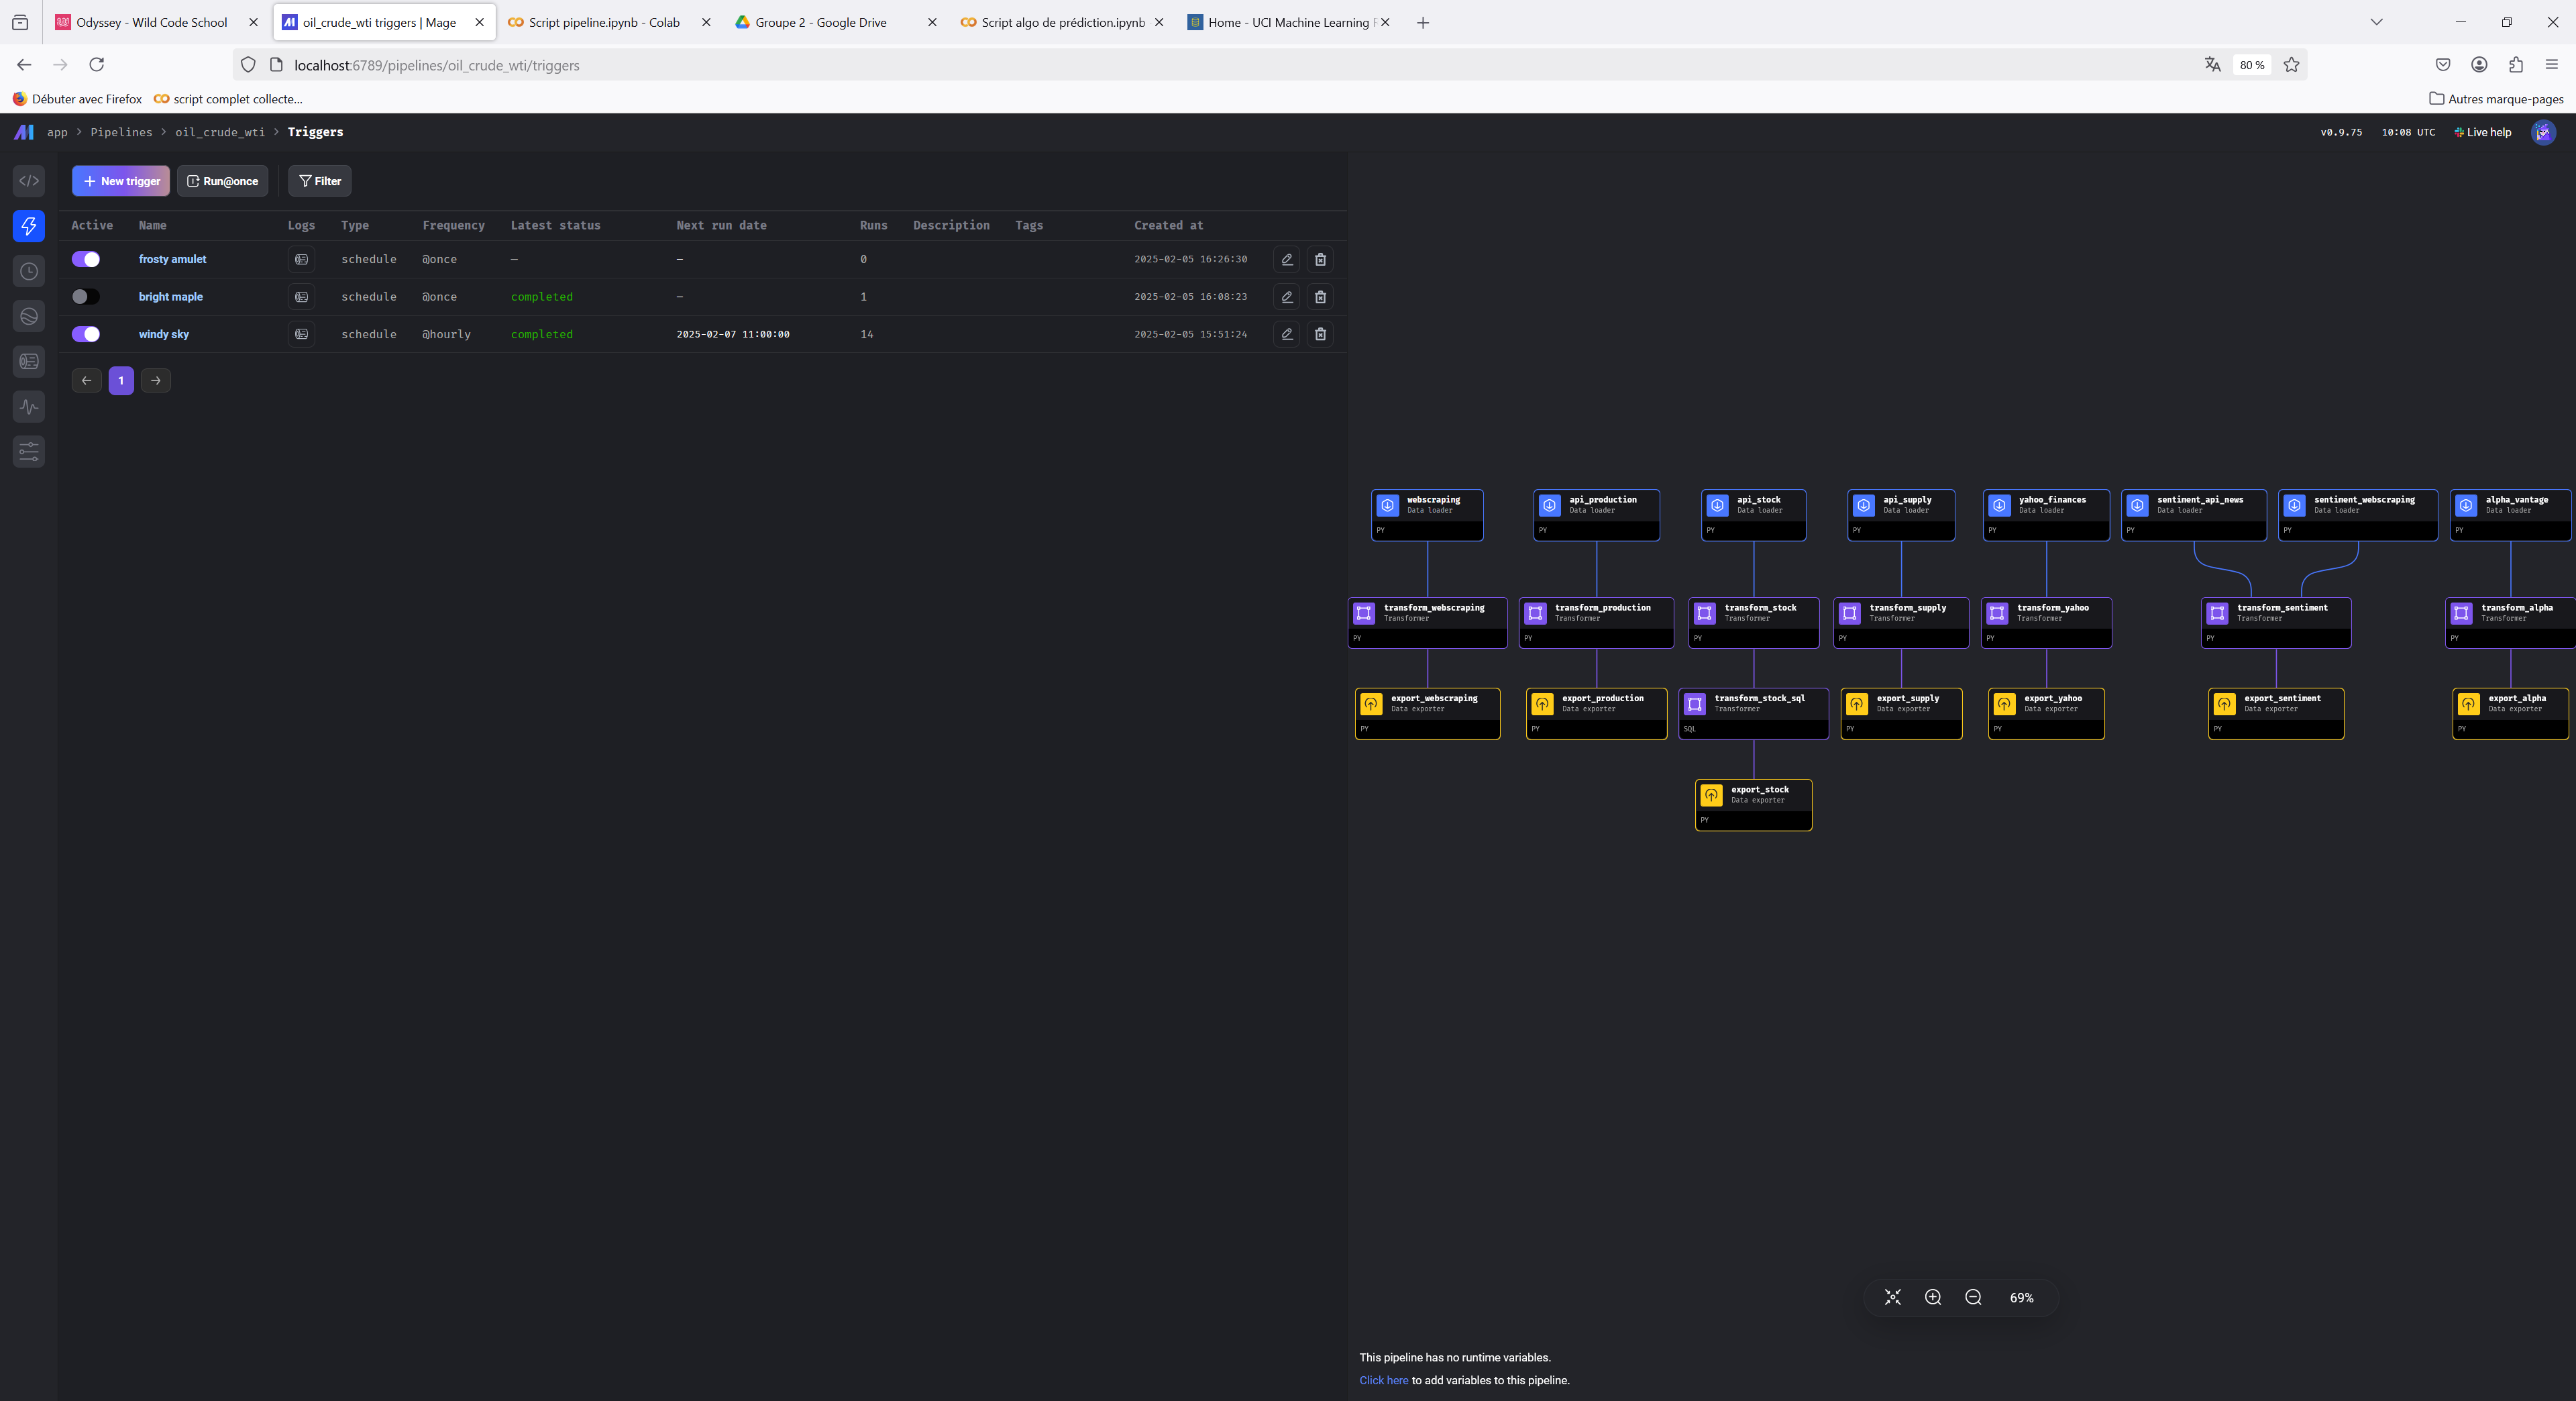